In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
!gdown --id 1reCBidpAaci6CZnZOxfZHvWO_VMNK93W -O tmp.zip
!unzip -q tmp.zip && rm tmp.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1reCBidpAaci6CZnZOxfZHvWO_VMNK93W
To: /content/tmp.zip
100% 1.41M/1.41M [00:00<00:00, 111MB/s]


In [3]:
consumption=pd.read_csv("powerconsumption.csv")

In [4]:
consumption['Datetime'] = pd.to_datetime(consumption['Datetime'])
consumption.set_index('Datetime', inplace=True)

In [5]:
consumption

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [6]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows',
            'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

In [7]:
df=consumption.copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [8]:
scaled_data

array([[-2.10664461,  0.35627749, -0.7989004 , ...,  0.23991683,
        -0.94467227,  0.36326195],
       [-2.13157832,  0.40129059, -0.7989004 , ..., -0.35485435,
        -0.3205729 ,  0.3466691 ],
       [-2.14894594,  0.40129059, -0.80017763, ..., -0.45114252,
        -0.39139766,  0.27680448],
       ...,
       [-2.0480074 ,  0.29197306, -0.79762318, ..., -0.38624194,
         0.81423659, -0.60840556],
       [-2.07242524,  0.30483395, -0.80017763, ..., -0.47497346,
         0.70167962, -0.65278385],
       [-2.10303352,  0.37556882, -0.79975189, ..., -0.56029223,
         0.57921197, -0.67801856]])

In [ ]:
isolation_forest = IsolationForest(contamination=0.05, n_estimators=100, n_jobs=-1)
isolation_forest.fit(scaled_data)

IsolationForest(contamination=0.05, n_jobs=-1)

In [ ]:
anomaly_scores = isolation_forest.predict(scaled_data)

In [ ]:
df['anomaly_score'] = anomaly_scores

In [ ]:
df.loc[df['anomaly_score'] == -1, 'anomaly_score'] = 0
df.loc[df['anomaly_score'] == 1, 'anomaly_score'] = 1
print(df.groupby('anomaly_score').size())

anomaly_score
0     2621
1    49795
dtype: int64


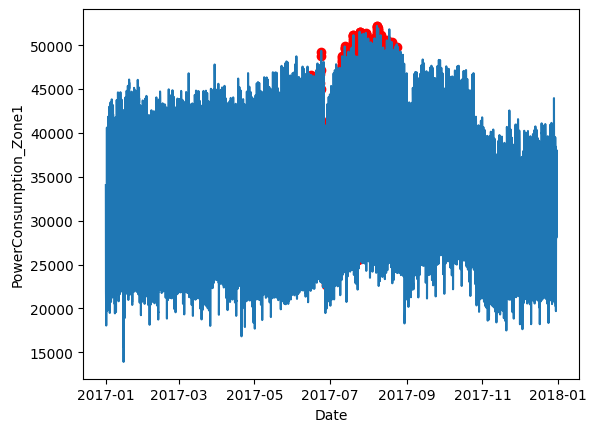

In [ ]:
plt.plot(df.index, df['PowerConsumption_Zone1'])
plt.scatter(df.index[df['anomaly_score'] == 0], df['PowerConsumption_Zone1'][df['anomaly_score'] == 0], c='red')
plt.xlabel('Date')
plt.ylabel('PowerConsumption_Zone1')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

In [ ]:
param_grid = {'n_estimators': [50, 100, 200], 'max_samples': [50, 100, 200], 'contamination': [0.05] }

In [ ]:
isolation_forest_model = IsolationForest()

grid_search = GridSearchCV(estimator=isolation_forest_model, param_grid=param_grid, scoring=silhouette_score, cv=5)
grid_search.fit(scaled_data)

Streaming output truncated to the last 5000 lines.
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1980750604)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=868749362)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1487893718)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=372594222)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=671577539)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=299521821)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1276492834)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=215258006)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1030723678)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=391153265)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1933656294)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1921522920)
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=20259

GridSearchCV(cv=5, estimator=IsolationForest(),
             param_grid={'contamination': [0.05], 'max_samples': [50, 100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring=<function silhouette_score at 0x79ef7f9541f0>)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 50, 'n_estimators': 50}


In [9]:
isolation_forest = IsolationForest(contamination=0.03, n_estimators=50, max_samples=50)
isolation_forest.fit(scaled_data)
anomaly_scores = isolation_forest.predict(scaled_data)
df['anomaly_score'] = anomaly_scores
df.loc[df['anomaly_score'] == -1, 'anomaly_score'] = 0
df.loc[df['anomaly_score'] == 1, 'anomaly_score'] = 1
print(df.groupby('anomaly_score').size())

anomaly_score
0     1573
1    50843
dtype: int64


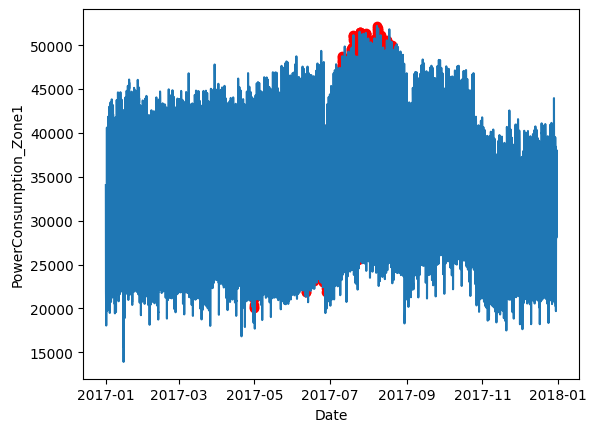

In [10]:
plt.plot(df.index, df['PowerConsumption_Zone1'])
plt.scatter(df.index[df['anomaly_score'] == 0], df['PowerConsumption_Zone1'][df['anomaly_score'] == 0], c='red')
plt.xlabel('Date')
plt.ylabel('PowerConsumption_Zone1')
plt.show()

In [11]:
import joblib

In [13]:
model_filename = 'isolation_forest_model.joblib'
joblib.dump(isolation_forest, model_filename)

['isolation_forest_model.joblib']